In [0]:
from IPython.display import clear_output

In [0]:
!apt install -q tesseract-ocr
!pip install -q pytesseract
clear_output()

In [0]:
import pytesseract
import cv2
from pytesseract import Output
import numpy as np
import os


CHAR_MAP = {'"': (0, 255, 0),
 '#': (0, 255, 0),
 '%': (0, 255, 0),
 '&': (0, 255, 0),
 ',': (0, 255, 0),
 '.': (0, 255, 0),
 '0': (0, 0, 255),
 '1': (0, 0, 255),
 '2': (0, 0, 255),
 '3': (0, 0, 255),
 '4': (0, 0, 255),
 '5': (0, 0, 255),
 '6': (0, 0, 255),
 '7': (0, 0, 255),
 '8': (0, 0, 255),
 '9': (0, 0, 255),
 ':': (0, 255, 0),
 'a': (0, 255, 255),
 'b': (0, 255, 255),
 'c': (0, 255, 255),
 'd': (0, 255, 255),
 'e': (0, 255, 255),
 'f': (0, 255, 255),
 'g': (0, 255, 255),
 'h': (0, 255, 255),
 'i': (0, 255, 255),
 'j': (0, 255, 255),
 'k': (0, 255, 255),
 'l': (0, 255, 255),
 'm': (0, 255, 255),
 'n': (0, 255, 255),
 'o': (0, 255, 255),
 'p': (0, 255, 255),
 'q': (0, 255, 255),
 'r': (0, 255, 255),
 's': (0, 255, 255),
 't': (0, 255, 255),
 'u': (0, 255, 255),
 'v': (0, 255, 255),
 'w': (0, 255, 255),
 'x': (0, 255, 255),
 'y': (0, 255, 255),
 'z': (0, 255, 255)}


def char_grid(input_dir, output_dir):
  img = cv2.imread(input_dir)
  height = img.shape[0]
  width = img.shape[1]
  blank_image = np.zeros((height,width,3), np.uint8)

  tess_img = pytesseract.image_to_boxes(
      img,
      output_type=Output.DICT
      )
  n_boxes = len(tess_img['char'])
  for i in range(n_boxes):
    try:
      annot_a = True

      (text, x1, y2, x2, y1) = (
        tess_img['char'][i],
        tess_img['left'][i],
        tess_img['top'][i],
        tess_img['right'][i],
        tess_img['bottom'][i]
        )
    except:
      annot_a = False

    # print(annot_a)

    if annot_a:
      # print(annot_a)
      char_color = CHAR_MAP.get(
        text.strip().lower(),
        (255, 255, 255)
        )
      x, y, w, h = x1, y1, (x2 - x1), (y2 - y1)
      cv2.rectangle(
          blank_image,
          (x1,height-y1),
          (x2,height-y2),
          char_color,
          cv2.FILLED
          )
      filename = input_dir.split('/')[-1]
      cv2.imwrite(os.path.join(output_dir, filename), blank_image)

In [0]:
char_grid("/content/AL173(1) (1).png", "/content/char-grid")

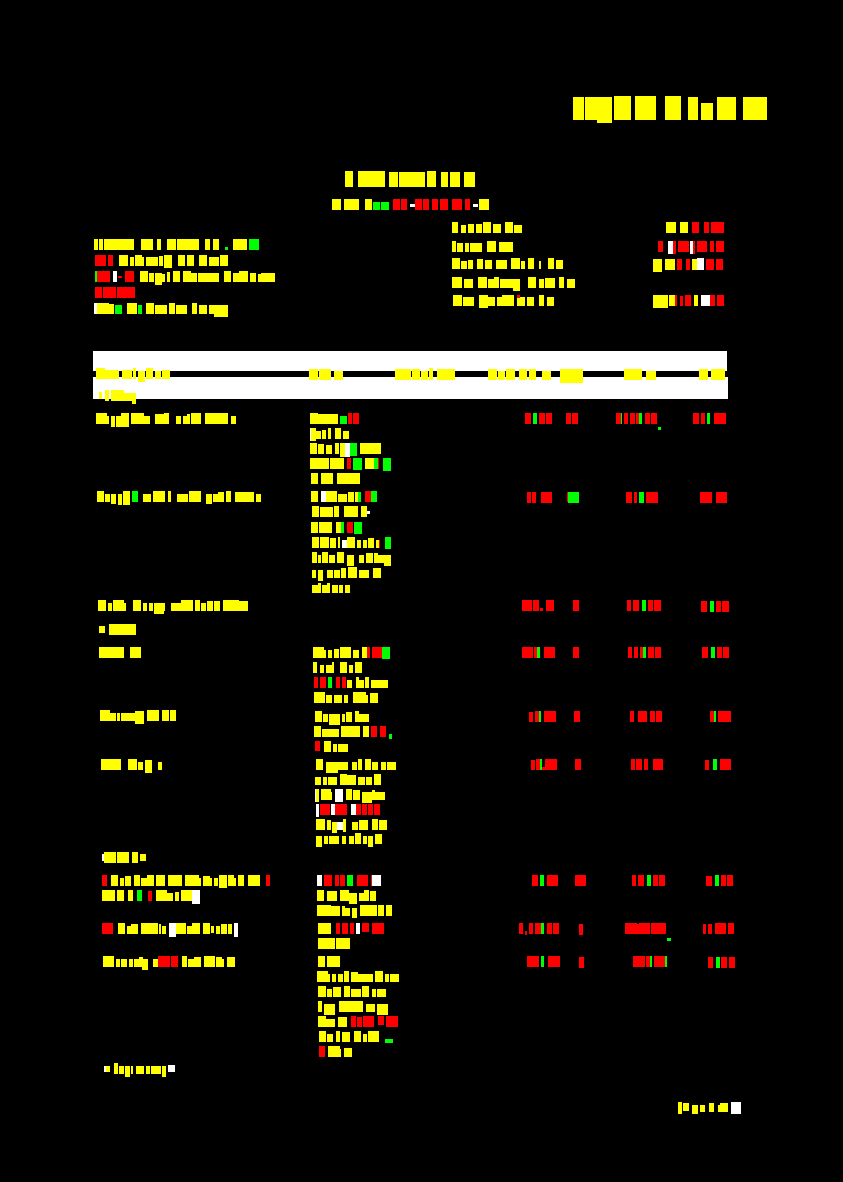

In [86]:
from google.colab.patches import cv2_imshow
test = img = cv2.imread("/content/char-grid/AL173(1) (1).png")
cv2_imshow(test)

to_use = "/content/char-grid/AL173(1) (1).png"

In [7]:
!pip install torch==1.3.1+cu100 torchvision==0.4.2+cu100 -f https://download.pytorch.org/whl/torch_stable.html
clear_output()

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 705.3MB 26kB/s 
     |████████████████████████████████| 10.2MB 360kB/s 
  Found existing installation: torch 1.4.0
    Uninstalling torch-1.4.0:
      Successfully uninstalled torch-1.4.0
  Found existing installation: torchvision 0.5.0
    Uninstalling torchvision-0.5.0:
      Successfully uninstalled torchvision-0.5.0


In [8]:
%%writefile setup.sh

git clone https://github.com/NVIDIA/apex
pip install -v --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" ./apex

Writing setup.sh


In [0]:
!sh setup.sh
clear_output()

In [0]:
import os
import cv2
import torch
import numpy as np
from torch.utils.data import Dataset

mean   = np.array([[[124.55, 118.90, 102.94]]])
std    = np.array([[[ 56.77,  55.97,  57.50]]])

image = cv2.imread(to_use)[:,:,::-1].astype(np.float32)
shape = image.shape
image = (image - mean)/std


# # (678, 753)
W = 352
H = 352

# W, H, C = shape
image = cv2.resize(image, dsize=(W, H), interpolation=cv2.INTER_LINEAR)


image = torch.from_numpy(image)
image = image.permute(2, 0, 1)

In [89]:
shape

(1182, 843, 3)

In [88]:
image.shape

torch.Size([3, 352, 352])

In [0]:
# mask  = cv2.imread('/content/drive/My Drive/KPMG_datasets/chargrid_image/AL173(1).png', 0).astype(np.float32)

In [0]:
# mask.shape

(1182, 843)

In [0]:
# image.shape

(352, 352, 3)

In [0]:
# image = torch.from_numpy(image)
# image = image.permute(2, 0, 1)

In [90]:
image.shape

torch.Size([3, 352, 352])

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

def weight_init(module):
    for n, m in module.named_children():
        print('initialize: '+n)
        if isinstance(m, nn.Conv2d):
            nn.init.kaiming_normal_(m.weight, mode='fan_in', nonlinearity='relu')
            if m.bias is not None:
                nn.init.zeros_(m.bias)
        elif isinstance(m, (nn.BatchNorm2d, nn.InstanceNorm2d)):
            nn.init.ones_(m.weight)
            if m.bias is not None:
                nn.init.zeros_(m.bias)
        elif isinstance(m, nn.Linear):
            nn.init.kaiming_normal_(m.weight, mode='fan_in', nonlinearity='relu')
            if m.bias is not None:
                nn.init.zeros_(m.bias)
        elif isinstance(m, nn.Sequential):
            weight_init(m)
        elif isinstance(m, nn.ReLU):
            pass
        else:
            m.initialize()


class Bottleneck(nn.Module):
    def __init__(self, inplanes, planes, stride=1, downsample=None, dilation=1):
        super(Bottleneck, self).__init__()
        self.conv1      = nn.Conv2d(inplanes, planes, kernel_size=1, bias=False)
        self.bn1        = nn.BatchNorm2d(planes)
        self.conv2      = nn.Conv2d(planes, planes, kernel_size=3, stride=stride, padding=(3*dilation-1)//2, bias=False, dilation=dilation)
        self.bn2        = nn.BatchNorm2d(planes)
        self.conv3      = nn.Conv2d(planes, planes*4, kernel_size=1, bias=False)
        self.bn3        = nn.BatchNorm2d(planes*4)
        self.downsample = downsample

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)), inplace=True)
        out = F.relu(self.bn2(self.conv2(out)), inplace=True)
        out = self.bn3(self.conv3(out))
        if self.downsample is not None:
            x = self.downsample(x)
        return F.relu(out+x, inplace=True)


class ResNet(nn.Module):
    def __init__(self):
        super(ResNet, self).__init__()
        self.inplanes = 64
        self.conv1    = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1      = nn.BatchNorm2d(64)
        self.layer1   = self.make_layer( 64, 3, stride=1, dilation=1)
        self.layer2   = self.make_layer(128, 4, stride=2, dilation=1)
        self.layer3   = self.make_layer(256, 6, stride=2, dilation=1)
        self.layer4   = self.make_layer(512, 3, stride=2, dilation=1)

    def make_layer(self, planes, blocks, stride, dilation):
        downsample    = nn.Sequential(nn.Conv2d(self.inplanes, planes*4, kernel_size=1, stride=stride, bias=False), nn.BatchNorm2d(planes*4))
        layers        = [Bottleneck(self.inplanes, planes, stride, downsample, dilation=dilation)]
        self.inplanes = planes*4
        for _ in range(1, blocks):
            layers.append(Bottleneck(self.inplanes, planes, dilation=dilation))
        return nn.Sequential(*layers)

    def forward(self, x):
        out1 = F.relu(self.bn1(self.conv1(x)), inplace=True)
        out1 = F.max_pool2d(out1, kernel_size=3, stride=2, padding=1)
        out2 = self.layer1(out1)
        out3 = self.layer2(out2)
        out4 = self.layer3(out3)
        out5 = self.layer4(out4)
        return out2, out3, out4, out5

    def initialize(self):
        self.load_state_dict(torch.load('../res/resnet50-19c8e357.pth'), strict=False)


class CFM(nn.Module):
    def __init__(self):
        super(CFM, self).__init__()
        self.conv1h = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.bn1h   = nn.BatchNorm2d(64)
        self.conv2h = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.bn2h   = nn.BatchNorm2d(64)
        self.conv3h = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.bn3h   = nn.BatchNorm2d(64)
        self.conv4h = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.bn4h   = nn.BatchNorm2d(64)

        self.conv1v = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.bn1v   = nn.BatchNorm2d(64)
        self.conv2v = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.bn2v   = nn.BatchNorm2d(64)
        self.conv3v = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.bn3v   = nn.BatchNorm2d(64)
        self.conv4v = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.bn4v   = nn.BatchNorm2d(64)

    def forward(self, left, down):
        if down.size()[2:] != left.size()[2:]:
            down = F.interpolate(down, size=left.size()[2:], mode='bilinear')
        out1h = F.relu(self.bn1h(self.conv1h(left )), inplace=True)
        out2h = F.relu(self.bn2h(self.conv2h(out1h)), inplace=True)
        out1v = F.relu(self.bn1v(self.conv1v(down )), inplace=True)
        out2v = F.relu(self.bn2v(self.conv2v(out1v)), inplace=True)
        fuse  = out2h*out2v
        out3h = F.relu(self.bn3h(self.conv3h(fuse )), inplace=True)+out1h
        out4h = F.relu(self.bn4h(self.conv4h(out3h)), inplace=True)
        out3v = F.relu(self.bn3v(self.conv3v(fuse )), inplace=True)+out1v
        out4v = F.relu(self.bn4v(self.conv4v(out3v)), inplace=True)
        return out4h, out4v

    def initialize(self):
        weight_init(self)


class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        self.cfm45  = CFM()
        self.cfm34  = CFM()
        self.cfm23  = CFM()

    def forward(self, out2h, out3h, out4h, out5v, fback=None):
        if fback is not None:
            refine5      = F.interpolate(fback, size=out5v.size()[2:], mode='bilinear')
            refine4      = F.interpolate(fback, size=out4h.size()[2:], mode='bilinear')
            refine3      = F.interpolate(fback, size=out3h.size()[2:], mode='bilinear')
            refine2      = F.interpolate(fback, size=out2h.size()[2:], mode='bilinear')
            out5v        = out5v+refine5
            out4h, out4v = self.cfm45(out4h+refine4, out5v)
            out3h, out3v = self.cfm34(out3h+refine3, out4v)
            out2h, pred  = self.cfm23(out2h+refine2, out3v)
        else:
            out4h, out4v = self.cfm45(out4h, out5v)
            out3h, out3v = self.cfm34(out3h, out4v)
            out2h, pred  = self.cfm23(out2h, out3v)
        return out2h, out3h, out4h, out5v, pred

    def initialize(self):
        weight_init(self)


class F3Net(nn.Module):
    # def __init__(self, cfg):
    def __init__(self):
        super(F3Net, self).__init__()
        # self.cfg      = cfg
        self.bkbone   = ResNet()
        self.squeeze5 = nn.Sequential(nn.Conv2d(2048, 64, 1), nn.BatchNorm2d(64), nn.ReLU(inplace=True))
        self.squeeze4 = nn.Sequential(nn.Conv2d(1024, 64, 1), nn.BatchNorm2d(64), nn.ReLU(inplace=True))
        self.squeeze3 = nn.Sequential(nn.Conv2d( 512, 64, 1), nn.BatchNorm2d(64), nn.ReLU(inplace=True))
        self.squeeze2 = nn.Sequential(nn.Conv2d( 256, 64, 1), nn.BatchNorm2d(64), nn.ReLU(inplace=True))

        self.decoder1 = Decoder()
        self.decoder2 = Decoder()
        self.linearp1 = nn.Conv2d(64, 1, kernel_size=3, stride=1, padding=1)
        self.linearp2 = nn.Conv2d(64, 1, kernel_size=3, stride=1, padding=1)

        self.linearr2 = nn.Conv2d(64, 1, kernel_size=3, stride=1, padding=1)
        self.linearr3 = nn.Conv2d(64, 1, kernel_size=3, stride=1, padding=1)
        self.linearr4 = nn.Conv2d(64, 1, kernel_size=3, stride=1, padding=1)
        self.linearr5 = nn.Conv2d(64, 1, kernel_size=3, stride=1, padding=1)
        self.initialize()

    def forward(self, x, shape=None):
        out2h, out3h, out4h, out5v        = self.bkbone(x)
        out2h, out3h, out4h, out5v        = self.squeeze2(out2h), self.squeeze3(out3h), self.squeeze4(out4h), self.squeeze5(out5v)
        out2h, out3h, out4h, out5v, pred1 = self.decoder1(out2h, out3h, out4h, out5v)
        out2h, out3h, out4h, out5v, pred2 = self.decoder2(out2h, out3h, out4h, out5v, pred1)

        shape = x.size()[2:] if shape is None else shape
        pred1 = F.interpolate(self.linearp1(pred1), size=shape, mode='bilinear')
        pred2 = F.interpolate(self.linearp2(pred2), size=shape, mode='bilinear')

        out2h = F.interpolate(self.linearr2(out2h), size=shape, mode='bilinear')
        out3h = F.interpolate(self.linearr3(out3h), size=shape, mode='bilinear')
        out4h = F.interpolate(self.linearr4(out4h), size=shape, mode='bilinear')
        out5h = F.interpolate(self.linearr5(out5v), size=shape, mode='bilinear')
        return pred1, pred2, out2h, out3h, out4h, out5h


    def initialize(self):
        self.load_state_dict(torch.load("/content/drive/My Drive/KPMG_datasets/pretrainned-models/model-1000"))

In [0]:
!wget https://0c8b6a68.ngrok.io/model-1000

--2020-03-31 09:19:54--  https://0c8b6a68.ngrok.io/model-1000
Resolving 0c8b6a68.ngrok.io (0c8b6a68.ngrok.io)... 3.13.191.225, 2600:1f16:d83:1200:3eca:f5ef:64eb:78f6
Connecting to 0c8b6a68.ngrok.io (0c8b6a68.ngrok.io)|3.13.191.225|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102506466 (98M) [application/octet-stream]
Saving to: ‘model-1000’

model-1000          100%[===================>]  97.76M  3.56MB/s    in 27s     

2020-03-31 09:20:22 (3.56 MB/s) - ‘model-1000’ saved [102506466/102506466]



In [0]:
!cp /content/model-1000 /content/drive/'My Drive'/KPMG_datasets/pretrainned-models/


In [0]:
Net = F3Net()

In [0]:
Net.cuda()

clear_output()

In [94]:
with torch.no_grad():
  image = image.cuda().float()
  shape_mask = cv2.imread(to_use, 0).astype(np.float32).shape
  out1u, out2u, out2r, out3r, out4r, out5r = Net(image[None, ...], shape_mask)

  out = out2u
  pred  = (torch.sigmoid(out[0,0])*255).cpu().detach().numpy()
  cv2.imwrite('/content/AL173(1).png', np.round(pred))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2494: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


In [0]:
# image = image.cuda().float()

In [0]:
# shape_mask = cv2.imread(to_use, 0).astype(np.float32).shape

In [73]:
# shape_mask

(1170, 827)

In [74]:
# out1u, out2u, out2r, out3r, out4r, out5r = Net(image[None, ...], shape_mask)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2494: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


In [0]:
# out = out2u

In [0]:
# pred  = (torch.sigmoid(out[0,0])*255).cpu().detach().numpy()

In [77]:
# cv2.imwrite('/content/AL177(5).png', np.round(pred))

True

In [0]:
import numpy as np
import cv2 as cv
im = cv.imread('/content/AL173(1).png')
imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

In [0]:
im_org = cv.imread('/content/AL173(1) (1).png')
bounding_boxs = [cv.boundingRect(c) for c in contours]
for bb in bounding_boxs:
  x,y,w,h = bb
  cv.rectangle(im_org,(x,y),(x+w,y+h),(0,255,0), 3)

In [97]:
cv2_imshow(im_org)